In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import statistics
from IPython.display import Math, Latex
from IPython.core.display import Image
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

In [2]:
df_nyc = pd.read_csv('nyc-rolling-sales.csv')

In [3]:
df_nyc

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


# Exploratory Data Analysis

In [4]:
df_nyc.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
df_nyc.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [6]:
df_nyc.shape

(84548, 22)

In [7]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [8]:
df_nyc.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

In [9]:
df_nyc.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [10]:
df_nyc.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_nyc.drop(['EASE-MENT'], axis = 1, inplace = True)

In [11]:
df_nyc.columns.values

array(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

In [12]:
df_nyc.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [25]:
df_nyc.isna().sum() /len(df_nyc) *100

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.000000
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.000000
ADDRESS                            0.000000
APARTMENT NUMBER                   0.000000
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  31.049818
GROSS SQUARE FEET                 32.658372
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                        17.222170
SALE DATE                          0.000000
dtype: float64

In [27]:
df_nyc['LAND SQUARE FEET'].fillna(df_nyc['LAND SQUARE FEET'].median(), inplace=True)
df_nyc['GROSS SQUARE FEET'].fillna(df_nyc['GROSS SQUARE FEET'].median(), inplace=True)
df_nyc['SALE PRICE'].fillna(df_nyc['SALE PRICE'].median(), inplace=True)

In [28]:
df_nyc.isna().sum() /len(df_nyc) *100

BOROUGH                           0.0
NEIGHBORHOOD                      0.0
BUILDING CLASS CATEGORY           0.0
TAX CLASS AT PRESENT              0.0
BLOCK                             0.0
LOT                               0.0
BUILDING CLASS AT PRESENT         0.0
ADDRESS                           0.0
APARTMENT NUMBER                  0.0
ZIP CODE                          0.0
RESIDENTIAL UNITS                 0.0
COMMERCIAL UNITS                  0.0
TOTAL UNITS                       0.0
LAND SQUARE FEET                  0.0
GROSS SQUARE FEET                 0.0
YEAR BUILT                        0.0
TAX CLASS AT TIME OF SALE         0.0
BUILDING CLASS AT TIME OF SALE    0.0
SALE PRICE                        0.0
SALE DATE                         0.0
dtype: float64

In [29]:
df_nyc.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04,8.454800e+04,84548.000000,84548.000000,8.454800e+04
mean,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,3.439701e+03,3.273106e+03,1789.322976,1.657485,1.147900e+06
std,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,3.486985e+04,2.876966e+04,537.344993,0.819341,1.038058e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,2.000000e+03,1.348000e+03,1920.000000,1.000000,3.000000e+05
50%,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,2.000000,5.300000e+05
75%,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,2.658000e+03,2.080000e+03,1965.000000,2.000000,8.300000e+05
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [30]:
df_nyc.dtypes

BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                            int64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                        float64
SALE DATE                          object
dtype: object

# Mengubah tipe data pada Sale Price, Land Square Feet dan Gross Square Feet

In [31]:
df_nyc['SALE PRICE'] = pd.to_numeric(df_nyc['SALE PRICE'], errors='coerce')
df_nyc['LAND SQUARE FEET'] = pd.to_numeric(df_nyc['LAND SQUARE FEET'], errors='coerce')
df_nyc['GROSS SQUARE FEET']= pd.to_numeric(df_nyc['GROSS SQUARE FEET'], errors='coerce')

In [32]:
df_nyc.dtypes

BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                            int64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                        float64
SALE DATE                          object
dtype: object

# Menghitung Mean, Modus, Median pada harga dari semua wilayah

In [38]:
mean_nyc_sell = statistics.mean(df_nyc['SALE PRICE'])
median_nyc_sell = statistics.median(df_nyc['SALE PRICE'])
mode_nyc_sell = statistics.mode(df_nyc['SALE PRICE'])
print ('mean dari SALE PRICE: ', mean_nyc_sell)
print ('median dari SALE PRICE: ', median_nyc_sell)
print ('modus dari SALE PRICE: ', mode_nyc_sell)

mean dari SALE PRICE:  1147900.4933174055
median dari SALE PRICE:  530000.0
modus dari SALE PRICE:  530000.0


# Menghitung Mean, Modus, Median pada Land Square Feet dari semua wilayah

In [39]:
mean_nyc_land = statistics.mean(df_nyc['LAND SQUARE FEET'])
median_nyc_land = statistics.median(df_nyc['LAND SQUARE FEET'])
mode_nyc_land = statistics.mode(df_nyc['LAND SQUARE FEET'])
print ('mean dari LAND SQUARE FEET: ', mean_nyc_land)
print ('median dari LAND SQUARE FEET: ', median_nyc_land)
print ('modus dari LAND SQUARE FEET: ', mode_nyc_land)

mean dari LAND SQUARE FEET:  3439.700891801107
median dari LAND SQUARE FEET:  2325.0
modus dari LAND SQUARE FEET:  2325.0


# Menghitung Mean, Modus, Median pada Gross Square Feet dari semua wilayah

In [41]:
mean_nyc_gross = statistics.mean(df_nyc['GROSS SQUARE FEET'])
median_nyc_gross = statistics.median(df_nyc['GROSS SQUARE FEET'])
mode_nyc_gross = statistics.mode(df_nyc['GROSS SQUARE FEET'])
print ('mean dari GROSS SQUARE FEET: ', mean_nyc_gross)
print ('median dari GROSS SQUARE FEET: ', median_nyc_gross)
print ('modus dari GROSS SQUARE FEET: ', mode_nyc_gross)

mean dari GROSS SQUARE FEET:  3273.105939821167
median dari GROSS SQUARE FEET:  1680.0
modus dari GROSS SQUARE FEET:  1680.0


# Menghitung Modus pada Borough dan Neighborhood

In [45]:
mode_borough      = statistics.mode(df_nyc['BOROUGH'])
mode_neighborhood = statistics.mode(df_nyc['NEIGHBORHOOD'])
print('Modus pada Borough: ', mode_borough)
print('Modus pada Neighborhood: ', mode_neighborhood)

Modus pada Borough:  4
Modus pada Neighborhood:  FLUSHING-NORTH


# Top 5 Neigborhood

In [52]:
neighborhood_counts=df_nyc.groupby('NEIGHBORHOOD').apply(lambda x:x['NEIGHBORHOOD'].count()).reset_index(name='neighborhood Counts')
top_cities_order=neighborhood_counts.sort_values(by='neighborhood Counts',ascending=False)
top_cities=top_cities_order[:5]
print('Top 5 number of neighborhood: ',top_cities)

Top 5 number of neighborhood:                  NEIGHBORHOOD  neighborhood Counts
87            FLUSHING-NORTH                 3068
228  UPPER EAST SIDE (59-79)                 1736
229  UPPER EAST SIDE (79-96)                 1590
231  UPPER WEST SIDE (59-79)                 1439
14        BEDFORD STUYVESANT                 1436


# Menghitung Range, Variance, Standard Deviation dari mean sell price pada top 5 NeighborHood

In [77]:
flushnorth_price = 0
flushnorth_total = 0
flushnorth_arr = []


flushnorth_index = df_nyc[df_nyc['NEIGHBORHOOD'] == 'FLUSHING-NORTH'].index

for index in flushnorth_index: 
    flushnorth_price = df_nyc.iloc[index]['SALE PRICE']  
    flushnorth_total += flushnorth_price
    flushnorth_arr.append(flushnorth_price)
    
print('Displaying summary statistics for Flushing-North')
print('Range (FLUSHING-NORTH)             :',np.ptp(flushnorth_arr))
print('Standard Deviation (FLUSHING-NORTH):',statistics.stdev(flushnorth_arr))
print('Variance (FLUSHING-NORTH)          :',statistics.variance(flushnorth_arr))
print('Max (FLUSHING-NORTH)               :', np.max(flushnorth_arr))
print('Min (FLUSHING-NORTH)               :', np.min(flushnorth_arr))

Displaying summary statistics for Flushing-North
Range (FLUSHING-NORTH)             : 64882138.0
Standard Deviation (FLUSHING-NORTH): 1896995.1754919363
Variance (FLUSHING-NORTH)          : 3598590695839.682
Max (FLUSHING-NORTH)               : 64882140.0
Min (FLUSHING-NORTH)               : 2.0


In [78]:
upper_east1_price = 0
upper_east1_total = 0
upper_east1_arr = []


upper_east1_index = df_nyc[df_nyc['NEIGHBORHOOD'] == 'UPPER EAST SIDE (59-79)'].index

for index in upper_east1_index: 
    upper_east1_price = df_nyc.iloc[index]['SALE PRICE']  
    upper_east1_total += upper_east1_price
    upper_east1_arr.append(upper_east1_price)
    
print('Displaying summary statistics for UPPER EAST SIDE (59-79)')
print('Range (FLUSHING-NORTH)             :',np.ptp(upper_east1_arr))
print('Standard Deviation (FLUSHING-NORTH):',statistics.stdev(upper_east1_arr))
print('Variance (FLUSHING-NORTH)          :',statistics.variance(upper_east1_arr))
print('Max (FLUSHING-NORTH)               :', np.max(upper_east1_arr))
print('Min (FLUSHING-NORTH)               :', np.min(upper_east1_arr))

Displaying summary statistics for UPPER EAST SIDE (59-79)
Range (FLUSHING-NORTH)             : 79499999.0
Standard Deviation (FLUSHING-NORTH): 4518699.142899421
Variance (FLUSHING-NORTH)          : 20418641944039.96
Max (FLUSHING-NORTH)               : 79500000.0
Min (FLUSHING-NORTH)               : 1.0


In [81]:
upper_east2_price = 0
upper_east2_total = 0
upper_east2_arr = []


upper_east2_index = df_nyc[df_nyc['NEIGHBORHOOD'] == 'UPPER EAST SIDE (79-96)'].index

for index in upper_east2_index: 
    upper_east2_price = df_nyc.iloc[index]['SALE PRICE']  
    upper_east2_total += upper_east2_price
    upper_east2_arr.append(upper_east2_price)
    
print('Displaying summary statistics for UPPER EAST SIDE (79-96)')
print('Range (FLUSHING-NORTH)             :',np.ptp(upper_east2_arr))
print('Standard Deviation (FLUSHING-NORTH):',statistics.stdev(upper_east2_arr))
print('Variance (FLUSHING-NORTH)          :',statistics.variance(upper_east2_arr))
print('Max (FLUSHING-NORTH)               :', np.max(upper_east2_arr))
print('Min (FLUSHING-NORTH)               :', np.min(upper_east2_arr))

Displaying summary statistics for UPPER EAST SIDE (79-96)
Range (FLUSHING-NORTH)             : 41999999.0
Standard Deviation (FLUSHING-NORTH): 3155349.876699795
Variance (FLUSHING-NORTH)          : 9956232844389.412
Max (FLUSHING-NORTH)               : 42000000.0
Min (FLUSHING-NORTH)               : 1.0


In [159]:
upper_west_price = 0
upper_west_total = 0
upper_west_arr = []


upper_west_index = df_nyc[df_nyc['NEIGHBORHOOD'] == 'UPPER WEST SIDE (59-79)'].index

for index in upper_west_index: 
    upper_west_price = df_nyc.iloc[index]['SALE PRICE']  
    upper_west_total += upper_west_price
    upper_west_arr.append(upper_west_price)
    
print('Displaying summary statistics for UPPER EAST SIDE (79-96)')
print('Range (FLUSHING-NORTH)             :',np.ptp(upper_west_arr))
print('Standard Deviation (FLUSHING-NORTH):',statistics.stdev(upper_west_arr))
print('Variance (FLUSHING-NORTH)          :',statistics.variance(upper_west_arr))
print('Max (FLUSHING-NORTH)               :', np.max(upper_west_arr))
print('Min (FLUSHING-NORTH)               :', np.min(upper_west_arr))

Displaying summary statistics for UPPER EAST SIDE (79-96)
Range (FLUSHING-NORTH)             : 144999999.0
Standard Deviation (FLUSHING-NORTH): 5547486.432908404
Variance (FLUSHING-NORTH)          : 30774605723302.8
Max (FLUSHING-NORTH)               : 145000000.0
Min (FLUSHING-NORTH)               : 1.0


In [84]:
bedford_price = 0
bedford_total = 0
bedford_arr = []


bedford_index = df_nyc[df_nyc['NEIGHBORHOOD'] == 'BEDFORD STUYVESANT'].index

for index in bedford_index: 
    bedford_price = df_nyc.iloc[index]['SALE PRICE']  
    bedford_total += bedford_price
    bedford_arr.append(bedford_price)
    
print('Displaying summary statistics for Flushing-North')
print('Range (FLUSHING-NORTH)             :',np.ptp(bedford_arr))
print('Standard Deviation (FLUSHING-NORTH):',statistics.stdev(bedford_arr))
print('Variance (FLUSHING-NORTH)          :',statistics.variance(bedford_arr))
print('Max (FLUSHING-NORTH)               :', np.max(bedford_arr))
print('Min (FLUSHING-NORTH)               :', np.min(bedford_arr))

Displaying summary statistics for Flushing-North
Range (FLUSHING-NORTH)             : 52350000.0
Standard Deviation (FLUSHING-NORTH): 1830538.2259144331
Variance (FLUSHING-NORTH)          : 3350870196533.96
Max (FLUSHING-NORTH)               : 52350000.0
Min (FLUSHING-NORTH)               : 0.0


C:\Users\adjie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

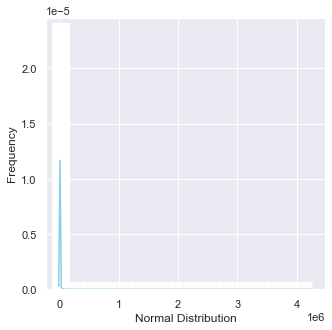

In [87]:
ax = sns.distplot(df_nyc['LAND SQUARE FEET'], 
                  bins = 100, 
                  kde = True,
                  color = 'skyblue',
                  hist_kws = {"linewidth":15, 'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [122]:
df_nyc_land = df_nyc[(df_nyc['LAND SQUARE FEET'] > 10000) & (df_nyc['LAND SQUARE FEET'] < 1000000000)]

C:\Users\adjie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LAND SQUARE FEET', ylabel='Density'>

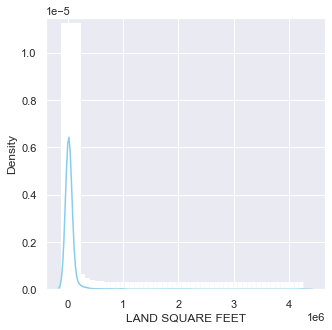

In [129]:
sns.distplot(df_nyc_land['LAND SQUARE FEET'], bins = 50, 
                  kde = True,
                  color = 'skyblue',
                  hist_kws = {"linewidth":15, 'alpha':1})

In [156]:
df_nyc_land['LAND SQUARE FEET'] = np.log(df_nyc_land['LAND SQUARE FEET'])

C:\Users\adjie\AppData\Local\Temp/ipykernel_46604/2332301747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyc_land['LAND SQUARE FEET'] = np.log(df_nyc_land['LAND SQUARE FEET'])


C:\Users\adjie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LAND SQUARE FEET', ylabel='Density'>

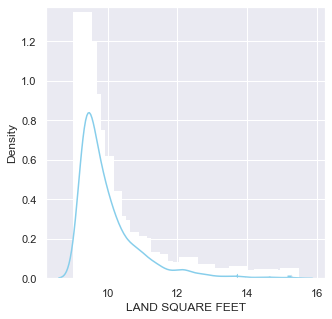

In [157]:
sns.distplot(df_nyc_land['LAND SQUARE FEET'], bins = 50,
             kde = True,
             color = 'skyblue',
             hist_kws = {"linewidth":15, 'alpha':1})

C:\Users\adjie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'SALE PRICE'), Text(0, 0.5, 'Frequency')]

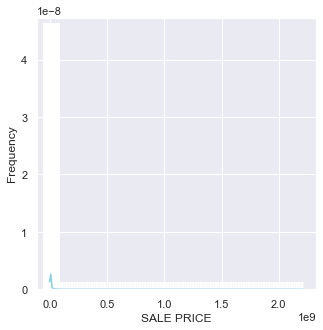

In [151]:
ax = sns.distplot(df_nyc['SALE PRICE'], 
                  bins = 100, 
                  kde = True,
                  color = 'skyblue',
                  hist_kws = {"linewidth":15, 'alpha':1})
ax.set(xlabel='SALE PRICE', ylabel='Frequency')

In [152]:
df_nyc_price = df_nyc[(df_nyc['SALE PRICE'] > 10000) & (df_nyc['SALE PRICE'] < 10000000)]

C:\Users\adjie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

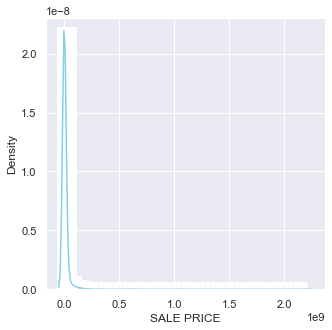

In [153]:
sns.distplot(df_nyc_land['SALE PRICE'], bins = 50, 
                  kde = True,
                  color = 'skyblue',
                  hist_kws = {"linewidth":15, 'alpha':1})

In [154]:
df_nyc_price['SALE PRICE'] = np.log(df_nyc_price['SALE PRICE'])

C:\Users\adjie\AppData\Local\Temp/ipykernel_46604/2384354264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyc_price['SALE PRICE'] = np.log(df_nyc_price['SALE PRICE'])


C:\Users\adjie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

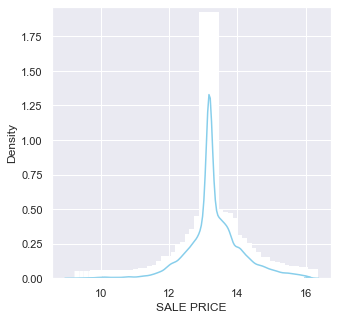

In [155]:
sns.distplot(df_nyc_price['SALE PRICE'], bins = 50,
             kde = True,
             color = 'skyblue',
             hist_kws = {"linewidth":15, 'alpha':1})

# Menghitung Confidence Interval harga pada FLUSHING-NORTH

In [178]:
mean = np.mean(flushnorth_arr)
std  = np.std(flushnorth_arr)
n    = len(flushnorth_arr)
z    = 0.96

In [179]:
se = std/ np.sqrt(n)

In [180]:
se

34242.68092567554

In [182]:
lsells = mean - z* se
usells = mean + z* se

lsells, usells

(814893.4695968794, 880639.4169741765)

Dengan Demikian, CI pada harga Flushing-North disekitar 814893 hingga 880639 dolar

# Hypotesis Testing

In [184]:
from scipy.stats import kendalltau

data1 = df_nyc['GROSS SQUARE FEET']
data2 = df_nyc['SALE PRICE']

stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Probability Independent')
else :
    print('Probability Dependent')

stat=0.101, p=0.000
Probability Dependent


Dengan demikian, Gross square feet berpengaruh pada Sale Price